In [75]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers


In [76]:
forecasting = 20

In [77]:
df = pd.read_csv('../omona/testset/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,6,0.355,2.24,-20
1,2011.3.7 18:29,6,0.352,2.24,-20
2,2011.3.8 6:29,6,0.351,2.24,-20
3,2011.3.8 18:29,6,0.353,2.24,-20
4,2011.3.9 6:29,6,0.352,2.24,-20
...,...,...,...,...,...
251,2011.8.30 5:28,6,0.646,2.27,-20
252,2011.8.30 17:28,6,0.649,2.27,-20
253,2011.8.31 5:28,6,0.650,2.27,-20
254,2011.8.31 16:09,6,0.655,2.27,-20


In [78]:
df = df['Resistance']
df

0      0.355
1      0.352
2      0.351
3      0.353
4      0.352
       ...  
251    0.646
252    0.649
253    0.650
254    0.655
255    0.657
Name: Resistance, Length: 256, dtype: float64

<AxesSubplot:>

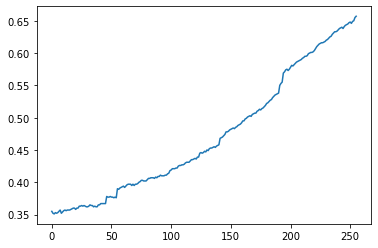

In [79]:
df.plot()

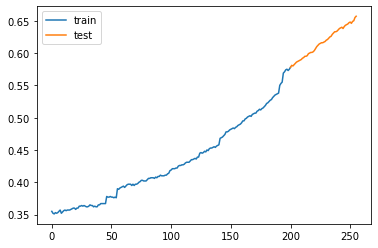

In [80]:
train = df.loc[:200,]
test = df.loc[200:,]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Resistance']
df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled_train = df_scaled.loc[:200,]
df_scaled_train.columns = scale_cols
#test_sc = sc.transform(test)

#train_sc
print(df_scaled_train)

df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled_test = scaler.transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled_test)
df_scaled_test = df_scaled.loc[200:,]
df_scaled_test.columns = scale_cols

print(df_scaled_test)


     Resistance
0      0.013072
1      0.003268
2      0.000000
3      0.006536
4      0.003268
..          ...
196    0.728758
197    0.732026
198    0.725490
199    0.732026
200    0.741830

[201 rows x 1 columns]
     Resistance
200    0.741830
201    0.751634
202    0.748366
203    0.754902
204    0.761438
205    0.767974
206    0.771242
207    0.774510
208    0.777778
209    0.781046
210    0.787582
211    0.790850
212    0.797386
213    0.797386
214    0.800654
215    0.810458
216    0.813725
217    0.816993
218    0.816993
219    0.820261
220    0.826797
221    0.836601
222    0.846405
223    0.852941
224    0.859477
225    0.862745
226    0.866013
227    0.866013
228    0.869281
229    0.872549
230    0.879085
231    0.882353
232    0.888889
233    0.895425
234    0.898693
235    0.908497
236    0.915033
237    0.921569
238    0.921569
239    0.924837
240    0.931373
241    0.937908
242    0.941176
243    0.944444
244    0.937908
245    0.947712
246    0.954248
247    0.957516


In [82]:
train_sc_df = pd.DataFrame(df_scaled_train, columns=['Resistance'], index=df_scaled_train.index)
test_sc_df = pd.DataFrame(df_scaled_test, columns=['Resistance'], index=df_scaled_test.index)
train_sc_df

,Resistance
0,0.013072
1,0.003268
2,0.000000
3,0.006536
4,0.003268
...,...
196,0.728758
197,0.732026
198,0.725490
199,0.732026


In [83]:
for s in range(1, 21):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Resistance'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Resistance'].shift(s)

train_sc_df.head(13)


,Resistance,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
0,0.013072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003268,0.013072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.003268,0.013072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.006536,0.000000,0.003268,0.013072,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.003268,0.006536,0.000000,0.003268,0.013072,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.006536,0.003268,0.006536,0.000000,0.003268,0.013072,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.013072,0.006536,0.003268,0.006536,0.000000,0.003268,0.013072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.019608,0.013072,0.006536,0.003268,0.006536,0.000000,0.003268,0.013072,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.003268,0.019608,0.013072,0.006536,0.003268,0.006536,0.000000,0.003268,0.013072,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.009804,0.003268,0.019608,0.013072,0.006536,0.003268,0.006536,0.000000,0.003268,0.013072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
X_train = train_sc_df.dropna().drop('Resistance', axis=1)
y_train = train_sc_df.dropna()[['Resistance']]

X_test = test_sc_df.dropna().drop('Resistance', axis=1)
y_test = test_sc_df.dropna()[['Resistance']]

X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
20,0.029412,0.029412,0.026144,0.022876,0.019608,0.019608,0.019608,0.016340,0.019608,0.016340,0.009804,0.003268,0.019608,0.013072,0.006536,0.003268,0.006536,0.000000,0.003268,0.013072
21,0.022876,0.029412,0.029412,0.026144,0.022876,0.019608,0.019608,0.019608,0.016340,0.019608,0.016340,0.009804,0.003268,0.019608,0.013072,0.006536,0.003268,0.006536,0.000000,0.003268
22,0.029412,0.022876,0.029412,0.029412,0.026144,0.022876,0.019608,0.019608,0.019608,0.016340,0.019608,0.016340,0.009804,0.003268,0.019608,0.013072,0.006536,0.003268,0.006536,0.000000
23,0.029412,0.029412,0.022876,0.029412,0.029412,0.026144,0.022876,0.019608,0.019608,0.019608,0.016340,0.019608,0.016340,0.009804,0.003268,0.019608,0.013072,0.006536,0.003268,0.006536
24,0.039216,0.029412,0.029412,0.022876,0.029412,0.029412,0.026144,0.022876,0.019608,0.019608,0.019608,0.016340,0.019608,0.016340,0.009804,0.003268,0.019608,0.013072,0.006536,0.003268


In [85]:
y_train.head()

,Resistance
20,0.022876
21,0.029412
22,0.029412
23,0.039216
24,0.039216


In [86]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)


(181, 20)
[[0.02941176 0.02941176 0.02614379 ... 0.         0.00326797 0.0130719 ]
 [0.02287582 0.02941176 0.02941176 ... 0.00653595 0.         0.00326797]
 [0.02941176 0.02287582 0.02941176 ... 0.00326797 0.00653595 0.        ]
 ...
 [0.73202614 0.72875817 0.71895425 ... 0.55882353 0.54901961 0.54248366]
 [0.7254902  0.73202614 0.72875817 ... 0.5620915  0.55882353 0.54901961]
 [0.73202614 0.7254902  0.73202614 ... 0.56862745 0.5620915  0.55882353]]
(181, 1)


In [87]:
X_train_t = X_train.reshape(X_train.shape[0], 20, 1)
X_test_t = X_test.reshape(X_test.shape[0], 20, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(181, 20, 1)
[[[0.02941176]
  [0.02941176]
  [0.02614379]
  ...
  [0.        ]
  [0.00326797]
  [0.0130719 ]]

 [[0.02287582]
  [0.02941176]
  [0.02941176]
  ...
  [0.00653595]
  [0.        ]
  [0.00326797]]

 [[0.02941176]
  [0.02287582]
  [0.02941176]
  ...
  [0.00326797]
  [0.00653595]
  [0.        ]]

 ...

 [[0.73202614]
  [0.72875817]
  [0.71895425]
  ...
  [0.55882353]
  [0.54901961]
  [0.54248366]]

 [[0.7254902 ]
  [0.73202614]
  [0.72875817]
  ...
  [0.5620915 ]
  [0.55882353]
  [0.54901961]]

 [[0.73202614]
  [0.7254902 ]
  [0.73202614]
  ...
  [0.56862745]
  [0.5620915 ]
  [0.55882353]]]
[[0.02287582]
 [0.02941176]
 [0.02941176]
 [0.03921569]
 [0.03921569]
 [0.04248366]
 [0.03921569]
 [0.04248366]
 [0.03921569]
 [0.03594771]
 [0.03594771]
 [0.03921569]
 [0.04575163]
 [0.04248366]
 [0.04248366]
 [0.03594771]
 [0.03921569]
 [0.03594771]
 [0.03594771]
 [0.04575163]
 [0.04575163]
 [0.05228758]
 [0.05228758]
 [0.05228758]
 [0.05228758]
 [0.05228758]
 [0.08823529]
 [0.084

In [88]:
from tensorflow.keras.models import load_model
model = load_model('model01.h5', compile = False)

In [89]:
y_pred = model.predict(X_test_t)
print(X_test_t.shape)
print(X_test_t)
print(y_pred.shape)
print(y_pred)

(36, 20, 1)
[[[0.82026144]
  [0.81699346]
  [0.81699346]
  [0.81372549]
  [0.81045752]
  [0.80065359]
  [0.79738562]
  [0.79738562]
  [0.79084967]
  [0.7875817 ]
  [0.78104575]
  [0.77777778]
  [0.7745098 ]
  [0.77124183]
  [0.76797386]
  [0.76143791]
  [0.75490196]
  [0.74836601]
  [0.75163399]
  [0.74183007]]

 [[0.82679739]
  [0.82026144]
  [0.81699346]
  [0.81699346]
  [0.81372549]
  [0.81045752]
  [0.80065359]
  [0.79738562]
  [0.79738562]
  [0.79084967]
  [0.7875817 ]
  [0.78104575]
  [0.77777778]
  [0.7745098 ]
  [0.77124183]
  [0.76797386]
  [0.76143791]
  [0.75490196]
  [0.74836601]
  [0.75163399]]

 [[0.83660131]
  [0.82679739]
  [0.82026144]
  [0.81699346]
  [0.81699346]
  [0.81372549]
  [0.81045752]
  [0.80065359]
  [0.79738562]
  [0.79738562]
  [0.79084967]
  [0.7875817 ]
  [0.78104575]
  [0.77777778]
  [0.7745098 ]
  [0.77124183]
  [0.76797386]
  [0.76143791]
  [0.75490196]
  [0.74836601]]

 [[0.84640523]
  [0.83660131]
  [0.82679739]
  [0.82026144]
  [0.81699346]
  [0.81

[array(220), array(221), array(222), array(223), array(224), array(225), array(226), array(227), array(228), array(229), array(230), array(231), array(232), array(233), array(234), array(235), array(236), array(237), array(238), array(239), array(240), array(241), array(242), array(243), array(244), array(245), array(246), array(247), array(248), array(249), array(250), array(251), array(252), array(253), array(254), array(255)]


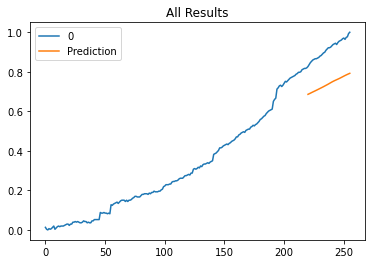

In [90]:
x_list = []
for i in range(256-36, 256-36+len(y_pred)):
     x_list.append(np.array(i))

        
print(x_list)        
df_scaled.plot()
plt.plot(x_list, y_pred, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()